In [1]:
from scipy.stats import f_oneway

perfomance1 = [89,89,88,78,79]
perfomance2 = [93,92,94,89,88]
perfomance3 = [89,88,89,93,90]
perfomance4 = [81,78,81,92,82]

f_oneway(perfomance1, perfomance2, perfomance3, perfomance4)

F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

In [2]:
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
#pg.welch_anova(dv='SalePrice',between='MSZoning', data=df)

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#tukey = pairwise_tukeyhsd(endog=df['SalePrice'], groups=df['MSZoning'], alpha=0.05)
#tukey.summary()

In [6]:
import pandas as pd
url = 'https://raw.githubusercontent.com/eduardamota/curso-eba/main/05-teste-hipotese-variancia-anova/datasets/house_price.csv'
df = pd.read_csv(url,index_col=0)
df

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam
1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam
1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam
1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam


## 1) A qualidade da casa é superior para as casas caras?

In [7]:
import numpy as np
df['categoria_preco'] = np.where(df['SalePrice']>214000, "cara", "barata")

In [8]:
df.categoria_preco.value_counts()

categoria_preco
barata    1098
cara       362
Name: count, dtype: int64

Vamos verificar se as variâncias são iguais ou não.

In [9]:
df.groupby('categoria_preco').OverallQual.var()

categoria_preco
barata    1.155817
cara      1.015082
Name: OverallQual, dtype: float64

In [11]:
import scipy.stats

caras = df[df['categoria_preco'] == 'cara']['OverallQual']
baratas = df[df['categoria_preco'] == 'barata']['OverallQual']

df_cara = len(caras)-1 #Graus de liberdade
df_barata = len(baratas)-1 #Graus de liberdade

F = baratas.var()/caras.var()
alpha = 0.05
1-scipy.stats.f.cdf(F, df_barata, df_cara)


0.06926035584305512

o nosso p-valor é maior que o alpha, logo aceitamos a hipótese nula que as variâncias são iguais!

Dado isso, vamos verificar se o preço influencia na qualidade geral da casa.

Como temos mais de 30 amostras e queremos comparar as médias, conseguimos aplicar o teste t para 2 amostras independetes com desvio padrão populacional desconhecido e var iguais.

In [12]:
import scipy.stats as stats

stats.ttest_ind(caras, baratas, equal_var=True)

TtestResult(statistic=32.11617268428233, pvalue=1.351855855595365e-171, df=1458.0)

O p-valor é muito pequeno, com 95% de confiança eu rejeito a hipótesse nula e afirmo que as casas tem médias diferentes.

## 2) Há diferença de média de preço significativa de acordo com a zona de moradia?  Use 95% confiança

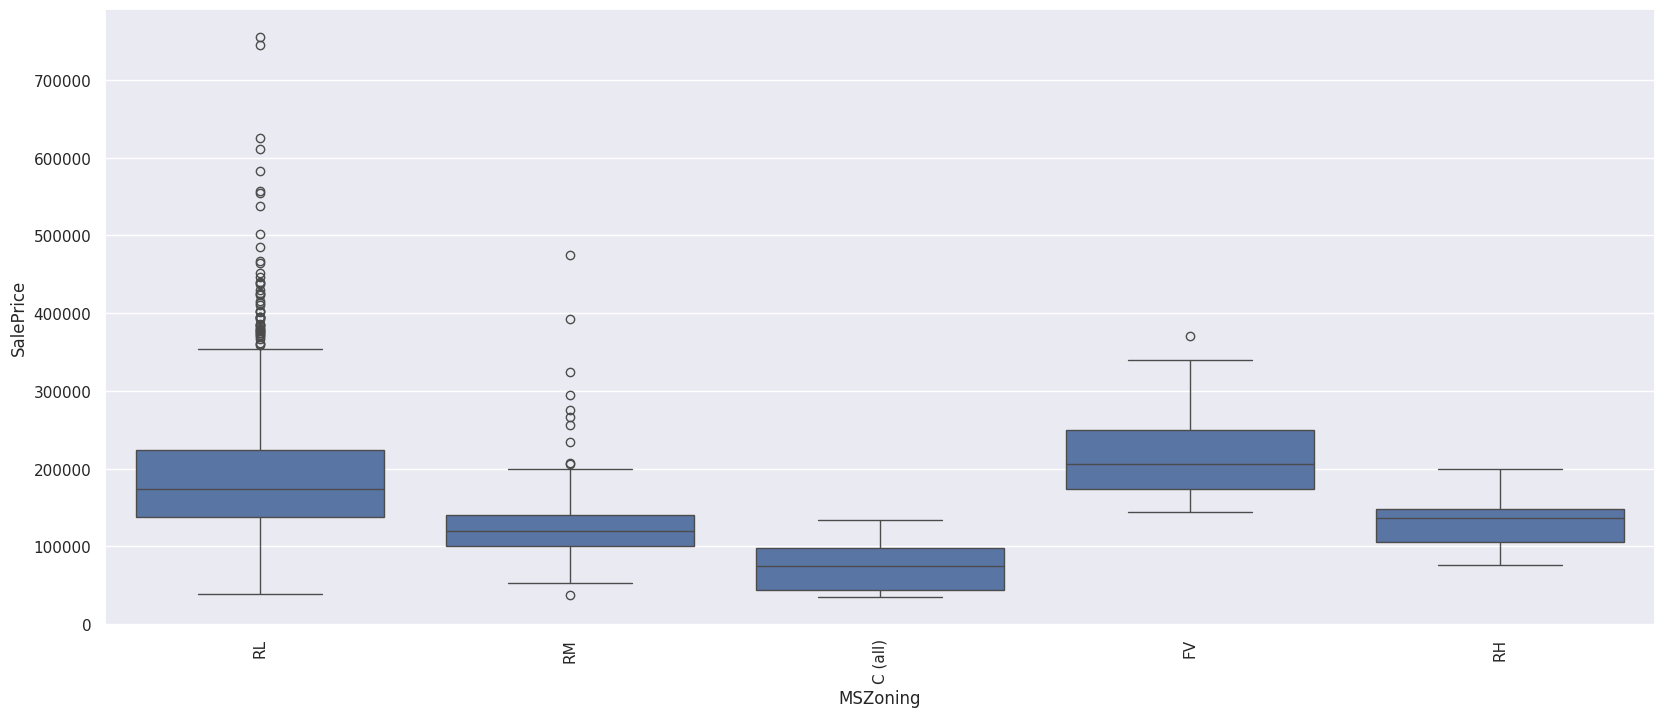

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#MSZoning
sns.set(rc = {'figure.figsize':(20,8)})
fig = sns.boxplot(x="MSZoning", y="SalePrice", data=df)
plt.xticks(rotation=90);

      #  A    Agriculture
      #  C    Commercial
      #  FV    Floating Village Residential
      #  I     Industrial
      #  RH    Residential High Density
      #  RL    Residential Low Density # describes the number of housing units per given unit of land in a particular area
      #  RP    Residential Low Density Park
      #  RM    Residential Medium Density

In [15]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [16]:
df.groupby('MSZoning').SalePrice.var()

MSZoning
C (all)    1.141838e+09
FV         2.742582e+09
RH         1.275498e+09
RL         6.523202e+09
RM         2.354354e+09
Name: SalePrice, dtype: float64

A ANOVA (Análise de Variância) é uma técnica estatística utilizada para verificar se as médias de três ou mais grupos são significativamente diferentes entre si. Para que a ANOVA seja aplicada corretamente, devem ser atendidas as seguintes condições:

1. **Amostras Aleatórias:**
   - As amostras de cada grupo devem ser selecionadas aleatoriamente da população, garantindo que cada membro tenha uma chance igual de ser incluído.

2. **Grupos Independentes:**
   - Os grupos devem ser independentes uns dos outros, ou seja, a seleção de membros de um grupo não deve influenciar a seleção de membros de outro grupo.

3. **Variável Dependente Contínua:**
   - A variável que estamos analisando deve ser contínua, o que significa que pode assumir qualquer valor dentro de um intervalo.

4. **Tamanho das Amostras:**
   - Cada grupo deve ter pelo menos 15 observações (n ≥ 15), garantindo que as estimativas sejam suficientemente precisas.

5. **Homogeneidade das Variâncias:**
   - As variâncias populacionais dos diferentes grupos devem ser aproximadamente iguais, uma condição conhecida como homocedasticidade. Isso assegura que a comparação entre as médias seja válida.

Atendendo a esses critérios, a ANOVA pode ser usada para testar a hipótese nula de que todas as médias dos grupos são iguais contra a hipótese alternativa de que pelo menos uma média é diferente das outras.

In [ ]:
#separando cada item em um dataset

In [17]:
lista_RL = df[df['MSZoning'] == 'RL']['SalePrice'].dropna()
lista_RM = df[df['MSZoning'] == 'RM']['SalePrice'].dropna()
lista_FV = df[df['MSZoning'] == 'FV']['SalePrice'].dropna()
lista_RH = df[df['MSZoning'] == 'RH']['SalePrice'].dropna()
lista_C = df[df['MSZoning'] == 'C (all)']['SalePrice'].dropna()

Teste de Barlett: Teste para variância para 3 ou mais amostras

In [20]:
stats.bartlett(lista_RL, lista_RM, lista_FV, lista_RH, lista_C)

BartlettResult(statistic=105.35211144902941, pvalue=7.12623706154424e-22)

Como p-valor é menor que alpha, concluimos que não podemos aceitar a hipótese nula, ou seja, as variâncias são diferentes.

##ANOVA WELCH

- Podemos usar quando as variâncias são diferentes!

In [21]:
import pingouin as pg

pg.welch_anova(dv='SalePrice',between='MSZoning', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,MSZoning,4,43.892971,95.072489,4.951041e-21,0.10756


### Porém, aqui cometemos um abuso!

ANOVA Welch e o Bartlett requer que os dados sejam normais ou que tenhamos pelo menos 15 dados em cada grupo. O grupo C tem apenas 10.

Para esse teste, precisaríamos de um teste **não paramétrico** para de fato comprovar essa diferença, como o Kruskal–Wallis

**Kruskal–Wallis**
O teste Kruskal-Wallis é um teste não paramétrico que pode ser usado para determinar se existem diferenças estatisticamente significativas entre dois ou mais grupos de uma variável independente em um variável dependente contínua ou ordinal. É considerada a alternativa não paramétrica à ANOVA one-way e uma extensão do teste U de Mann-Whitney para permitir a comparação de mais de dois grupos independentes.

In [24]:
stats.kruskal(lista_RL, lista_RM, lista_FV, lista_RH, lista_C)

KruskalResult(statistic=270.0701971937021, pvalue=3.0807239995999556e-57)

**Post Hoc**

Utilizando agora um teste post hoc vamos descobrir quais pares não são iguais. Dado que os nossos dados violam a aproximação de uma distribuição normal e as variâncias das amostras não são iguais, não podemos usar Tukey. Vamos então utilizar games howell!

In [25]:
pg.pairwise_gameshowell(data=df, dv='SalePrice', between='MSZoning')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,C (all),FV,74528.000000,214014.061538,-139486.061538,12505.093030,-11.154340,16.562315,3.680770e-08,-2.736320
1,C (all),RH,74528.000000,131558.375000,-57030.375000,13924.885315,-4.095572,20.080938,4.517312e-03,-1.577741
2,C (all),RL,74528.000000,191004.994787,-116476.994787,10947.657802,-10.639444,9.915396,7.454515e-06,-1.445853
3,C (all),RM,74528.000000,126316.830275,-51788.830275,11179.605575,-4.632438,10.778999,5.450447e-03,-1.074867
4,FV,RH,214014.061538,131558.375000,82455.686538,11041.385900,7.467875,32.919121,1.367747e-07,1.645290
5,FV,RL,214014.061538,191004.994787,23009.066751,6918.163260,3.325892,82.264978,1.123475e-02,0.289160
6,FV,RM,214014.061538,126316.830275,87697.231263,7279.653314,12.046897,99.041878,2.553513e-15,1.769629
7,RH,RL,131558.375000,191004.994787,-59446.619787,9240.457903,-6.433298,17.207462,5.088732e-05,-0.739397
8,RH,RM,131558.375000,126316.830275,5241.544725,9514.117496,0.550923,19.315009,9.805160e-01,0.109307
9,RL,RM,191004.994787,126316.830275,64688.164512,4057.981275,15.940972,479.588043,4.495293e-13,0.844471


O único grupo que com 95% de confiança aceitamos que tem variâncias iguais é o RH com o RM